<a href="https://colab.research.google.com/github/itamar-zamir/Life-Expectancy-CSV/blob/main/Deep_Learning_Project_Itamar_Zamir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 dir="rtl">
פרויקט למידה עמוקה מבוסס נתונים טבלאיים
</h1>
<h3 dir="rtl">
מגיש: איתמר זמיר
</h3>
<h3 dir="rtl">
מוגש למורה: שי פרח
</h3>

<h6 dir="rtl">
ייבוא קובץ הנתונים דרך המחשב
</h6>

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data (1).csv


<h1 dir="rtl">
EDA
</h1>

<h6 dir="rtl">
ייבוא הספריות המתאימות
</h6>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

<h6 dir="rtl">
קריאה לקובץ הנתונים- מסד שמכיל נתונים על המדינות השונות ותוחלת החיים בהן בשנים מ2000 עד 2015
</h6>

In [4]:
data_path = r'Life Expectancy Data.csv'
df = pd.read_csv(data_path)

<h6 dir="rtl">
הדפסת מימדי טבלת הנתונים מהקובץ
</h6>

In [ ]:
print(df.shape)

(2938, 22)


<h6 dir="rtl">
הדפסת השורות הראשונות בקובץ והשורות האחרונות בו
</h6>

In [ ]:
print(df.head())
print(df.tail())

       Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]
       Country  Year  ... Income composition of resources  Schooling
2933  Zimbabwe  2004  ...                           0.407        9.2
2934  Zimbabwe  2003  ...                           0.418        9.5
2935  Zimbabwe  2002  ...                           0.427       10.0
2936  Zimbabwe  2001  ...                           0.427        9.8
2937  Zimbabwe  2000  ...                           0.434        9.8

[5 rows x 22 columns]


<h6 dir="rtl">
הדפסת רשימת שמות העמודות במסד הנתונים
</h6>

In [ ]:
col_names = df.columns
print(col_names)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


<h6 dir="rtl">
הורדת כל הרווחים הלא רצויים משמות העמודות
</h6>

In [ ]:
df= df.rename(columns=lambda x: x.strip())
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


<h6 dir="rtl">
תיאור הקובץ
</h6>

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<h6 dir="rtl">
הדפסת מידע על קובץ הנתונים
</h6>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<h6 dir="rtl">
הדפסת אחוז המשתנים שהם null מתוך כלל ערכי המשתנים, עבור כל משתנה
</h6>

In [ ]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print("{} - {}%".format(col, (pct_missing / df.shape[0])))

Country - 0.0%
Year - 0.0%
Status - 0.0%
Life expectancy - 0.0034036759700476512%
Adult Mortality - 0.0034036759700476512%
infant deaths - 0.0%
Alcohol - 0.06603131381892444%
percentage expenditure - 0.0%
Hepatitis B - 0.18822328114363512%
Measles - 0.0%
BMI - 0.011572498298162015%
under-five deaths - 0.0%
Polio - 0.006466984343090538%
Total expenditure - 0.07692307692307693%
Diphtheria - 0.006466984343090538%
HIV/AIDS - 0.0%
GDP - 0.1524846834581348%
Population - 0.22191967324710687%
thinness  1-19 years - 0.011572498298162015%
thinness 5-9 years - 0.011572498298162015%
Income composition of resources - 0.056841388699795777%
Schooling - 0.05547991831177672%


<h6 dir="rtl">
הבחנה בין עמודות של משתנים מספריים ובין עמודות של משתנים קטגוריאליים
</h6>

In [ ]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
num_feature = list(df.drop(cat_feature, axis=1).columns)
print(num_feature)
print(cat_feature)

['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
['Country', 'Status']


<h6 dir="rtl">
חקירת עמודת המשתנה הקטגוריאלי Status
</h6>

In [ ]:
print(df['Status'].nunique())
print(df['Status'].unique())

2
['Developing' 'Developed']


<h6 dir="rtl">
שינוי המשתנה הקטגוריאלי Status למשתנה מספרי
</h6>

In [ ]:
df['Status'] = df['Status'].replace('Developing', 1)
df['Status'] = df['Status'].replace('Developed', 2)
        
print(df['Status'].nunique())
print(df['Status'].unique())

2
[1 2]


<h6 dir="rtl">
בדיקה שעמודת המשתנים הקטגוריאלים התעדכנה
</h6>

In [ ]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
print(cat_feature)

['Country']


<h6 dir="rtl">
בדיקת הקורלצייה בין כל משתני העמודות השונים באמצעות "מפת חום"
</h6>

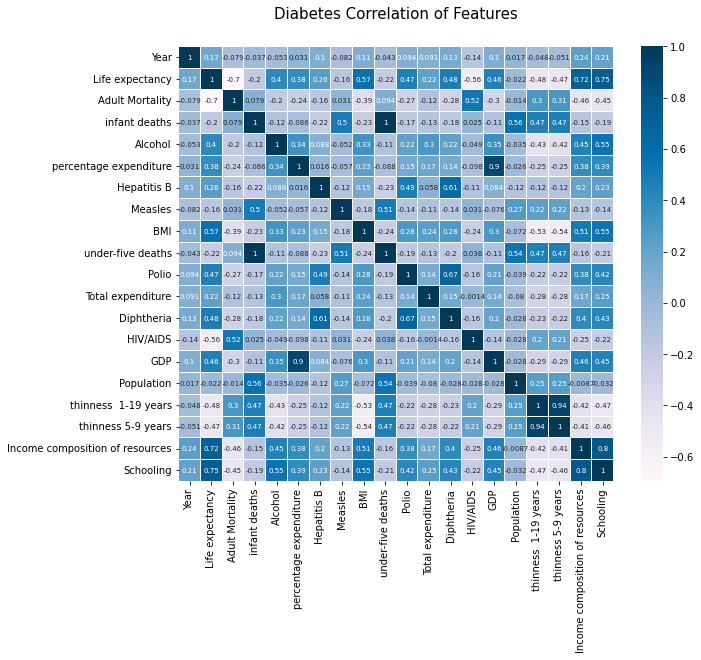

In [ ]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabetes Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df.loc[:, num_feature].astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

<h6 dir="rtl">
הצגת הקורלצייה בין משתני העמודות השונים לתוחלת החיים בלבד (שהיא משתנה המטרה)
</h6>

In [ ]:
df.corr()['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Status                             0.482136
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64

<h6 dir="rtl">
הצגת היסטוגרמה של התפלגות הערכים של משתני התכונות השונים
</h6>

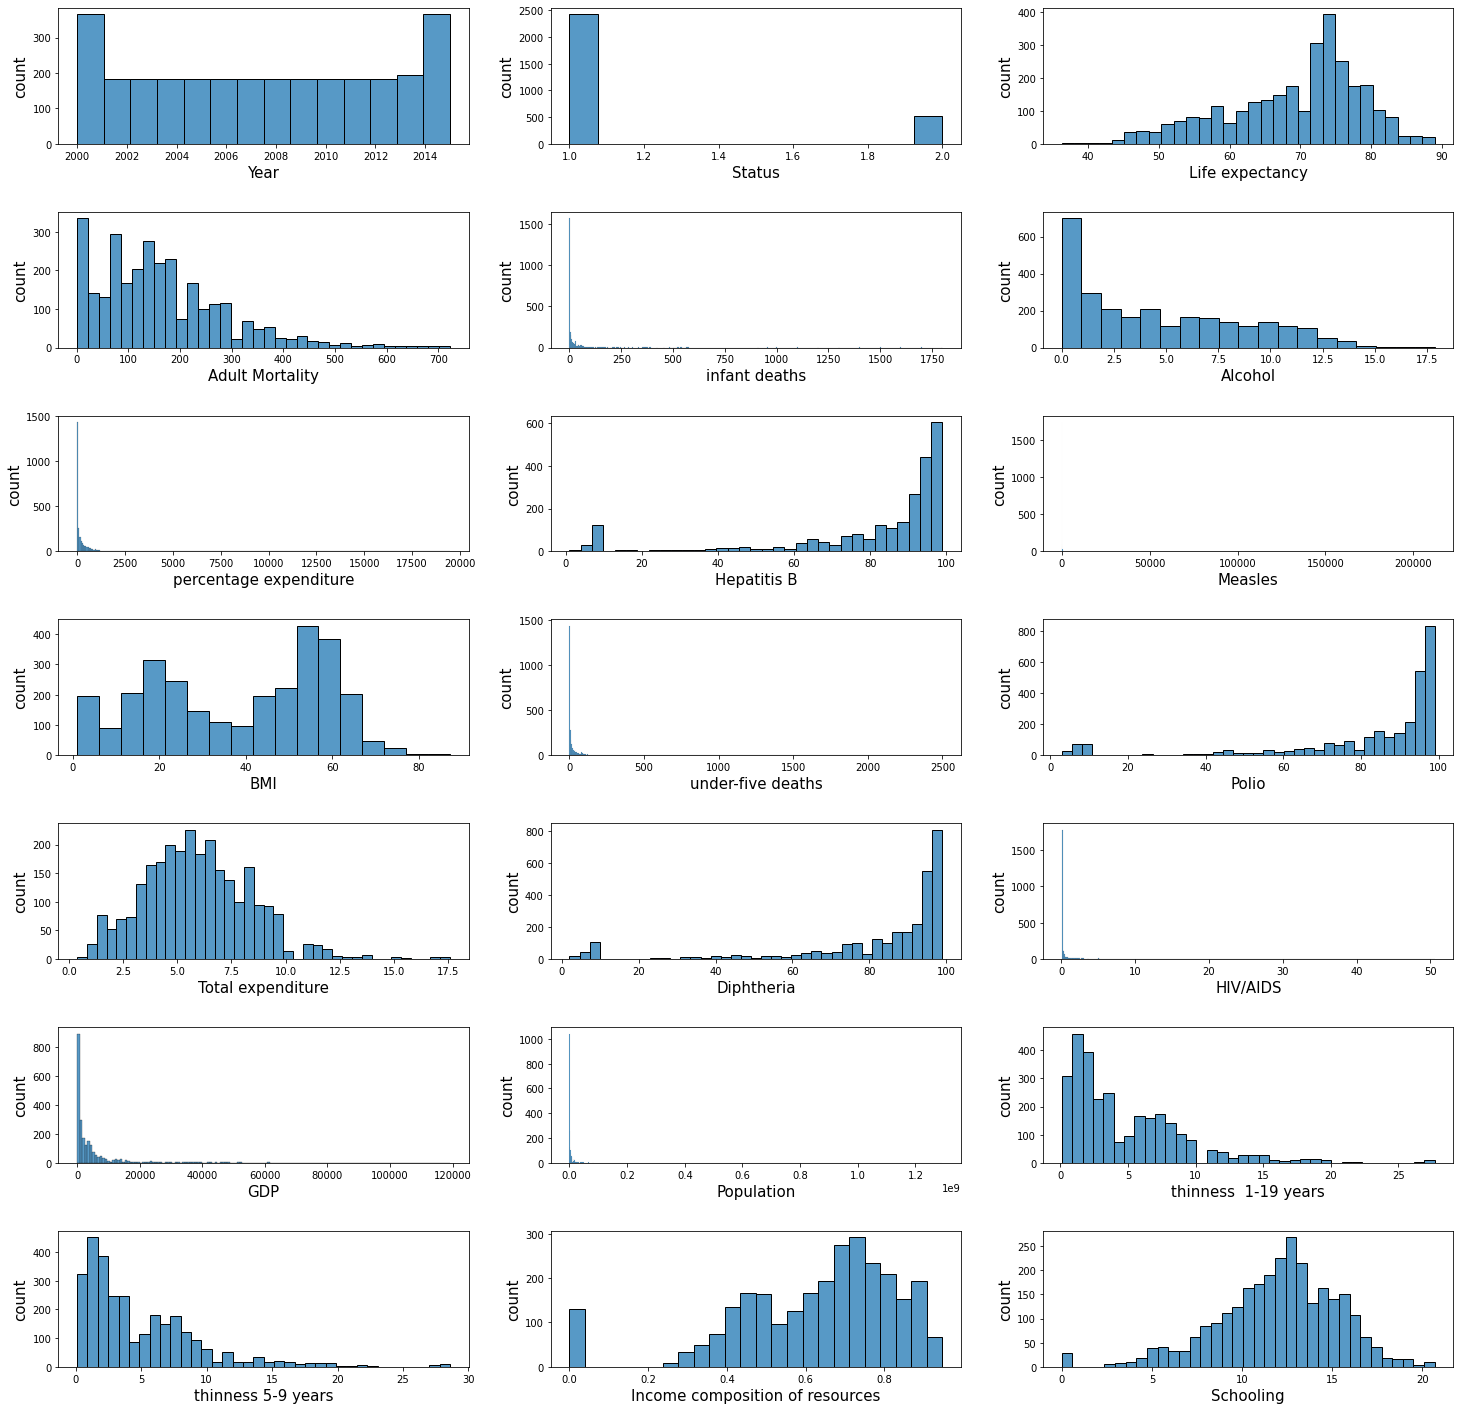

In [ ]:
fig, axs = plt.subplots(7,3, figsize=(25,25))
plt.subplots_adjust(hspace=0.5)
for c, feature in enumerate(num_feature):
    a= sns.histplot(x=feature, data=df, ax=axs.flat[c],)
    a.set_xlabel(feature,fontsize=15)
    a.set_ylabel('count',fontsize=15)   

<h6 dir="rtl">
הצגת גרפים של תוחלת החיים כתלות בכל אחד מהמשתנים
</h6>

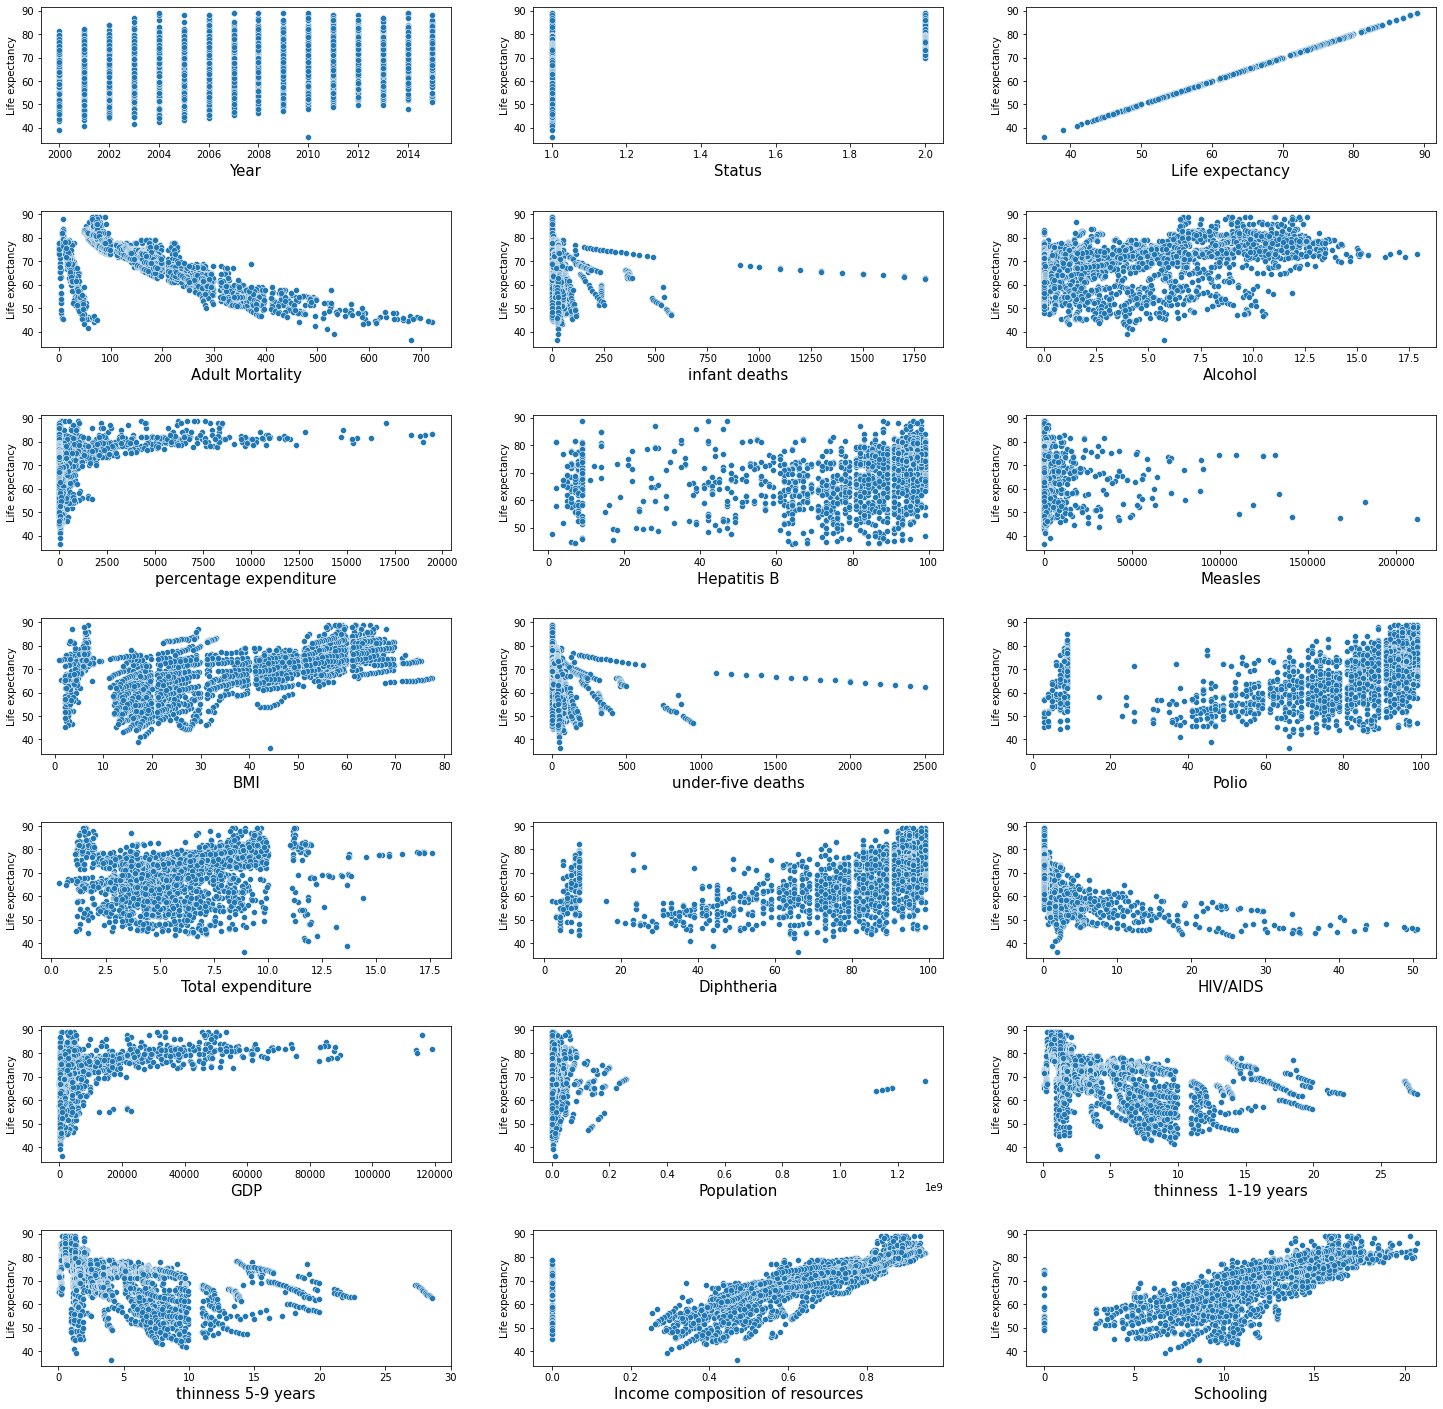

In [ ]:
fig, axs = plt.subplots(7,3, figsize=(25,25))
plt.subplots_adjust(hspace=0.5)
for c, feature in enumerate(num_feature):
    a = sns.scatterplot(x=feature, y='Life expectancy', data=df, ax = axs.flat[c])#, hue='Status')
    a.set_xlabel(feature,fontsize=15)

<h2 dir="rtl">
ניקוי הנתונים במסד 
</h2>

<h6 dir="rtl">
הסרת משתני התכונות בעלי הקורלציה הכי נמוכה ביחס לתוחלת החיים (והורדת הרזון בגילאי 5-9 כי הוא נכלל במשתנה של רזון בגילאי 1-19)
</h6>

In [ ]:
df_new = df.drop(['thinness 5-9 years', 'Population'], axis=1, inplace=False)
print(df_new.shape)

(2938, 20)


<h6 dir="rtl">
הורדת כל המשתנים הnull ממסד הנתונים
</h6>

In [ ]:
df_new.dropna(axis=0, how='any', inplace=True)#, subset=['Life expectancy'], inplace=True)
print(df_new.shape)
df_new.info()

(1853, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1853 non-null   object 
 1   Year                             1853 non-null   int64  
 2   Status                           1853 non-null   int64  
 3   Life expectancy                  1853 non-null   float64
 4   Adult Mortality                  1853 non-null   float64
 5   infant deaths                    1853 non-null   int64  
 6   Alcohol                          1853 non-null   float64
 7   percentage expenditure           1853 non-null   float64
 8   Hepatitis B                      1853 non-null   float64
 9   Measles                          1853 non-null   int64  
 10  BMI                              1853 non-null   float64
 11  under-five deaths                1853 non-null   int64  
 12  Polio    

<h6 dir="rtl">
הפיכת המתשנה הקטגוריאלי של מדינה למשתנה one-hot
</h6>

In [ ]:
df_new = pd.get_dummies(df_new, prefix=['Country'])

<h1 dir="rtl">
אימון המודל
</h1>

In [ ]:
# ייבוא הספריות הרלוונטיות
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import models

# יצירה של הקלט ושל הפלט של המודל
X = df_new.drop('Life expectancy', axis=1)
X = X.astype('float64')
y = df_new.loc[:, ['Life expectancy']]


# פיצול הקלט והפלט לסט אימון וסט מבחן
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# קביעת מספר התכונות (המשתנים הבלתי תלויים) שיש במודל
n_features = X_train.shape[1]

# (עם רגולריזציה בשכבה האמצעית) הגדרת המודל והוספת שכבות לרשת הנוירונים
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(12, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2()))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# הגדרת פונקציית השגיאה של המודל ואלגוריתם האופטימיזציה שלו
model.compile(optimizer='adam', loss='mse')  #, metrics=[coeff_determination])

# אימון המודל בתהליך מתמשך של אפוקים
history = model.fit(X_train, y_train, epochs=2000, batch_size=30)  #, verbose=0)
#history = model.fit(X_train, y_train, epochs=200, batch_size=30)
#history = model.fit(X_train, y_train, epochs=200, batch_size=30)

#model.save('my_model')
#model = models.load_model('my_model')

# הערכת שגיאת המודל
error = model.evaluate(X_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

(1575, 165) (278, 165) (1575, 1) (278, 1)
Epoch 1/2000
53/53 [==============================] - 0s 2ms/step - loss: 3204245.7500
Epoch 2/2000
53/53 [==============================] - 0s 2ms/step - loss: 273155.7812
Epoch 3/2000
53/53 [==============================] - 0s 2ms/step - loss: 8405.4873
Epoch 4/2000
53/53 [==============================] - 0s 1ms/step - loss: 2617.5068
Epoch 5/2000
53/53 [==============================] - 0s 2ms/step - loss: 2084.2583
Epoch 6/2000
53/53 [==============================] - 0s 2ms/step - loss: 1856.1611
Epoch 7/2000
53/53 [==============================] - 0s 2ms/step - loss: 1604.4047
Epoch 8/2000
53/53 [==============================] - 0s 2ms/step - loss: 1414.9319
Epoch 9/2000
53/53 [==============================] - 0s 2ms/step - loss: 1327.0203
Epoch 10/2000
53/53 [==============================] - 0s 2ms/step - loss: 1134.4237
Epoch 11/2000
53/53 [==============================] - 0s 2ms/step - loss: 1013.1347
Epoch 12/2000
53/53 [======

<h6 dir="rtl">

</h6>

<h6 dir="rtl">
יצירת גרף של שגיאת המודל לאורך האימון
</h6>

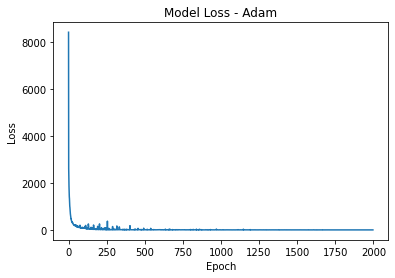

In [ ]:
plt.plot(history.history['loss'][2:])    #לא נתחשב בשגיאות המודל בשלבים הראשונים כי הן גדולות בהרבה משאר השגיאות 
plt.title('Model Loss - Adam')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

<h6 dir="rtl">
הדפסת ערכי החיזוי של המודל עבור כל הדוגמאות בסט המבחן
</h6>

In [ ]:
yhat_test = model.predict(X_test).flatten()
yhat_test

array([65.90589 , 72.03    , 66.10373 , 75.22488 , 64.36024 , 74.440414,
       76.801605, 49.588425, 76.124695, 66.98596 , 63.08562 , 82.075455,
       63.99874 , 82.32237 , 47.57325 , 62.032845, 75.71992 , 71.38732 ,
       77.3017  , 52.272137, 64.41516 , 54.689384, 74.66549 , 73.75346 ,
       74.214615, 81.99288 , 59.714684, 77.53995 , 73.55923 , 74.233505,
       74.553375, 66.46232 , 81.61298 , 80.49027 , 77.46907 , 65.08479 ,
       61.031624, 76.166534, 74.73741 , 74.20382 , 75.11188 , 74.24458 ,
       75.44112 , 76.120766, 80.58677 , 72.666725, 61.26224 , 81.08452 ,
       80.51946 , 77.08538 , 72.57129 , 75.266716, 73.42202 , 50.352657,
       72.75383 , 76.61889 , 73.87146 , 71.05814 , 76.75954 , 75.37433 ,
       81.03331 , 73.01454 , 67.9526  , 51.77012 , 74.527306, 76.36887 ,
       66.15241 , 82.68422 , 81.3791  , 72.943245, 69.342545, 74.86065 ,
       58.27546 , 70.99474 , 78.98697 , 77.39061 , 71.67609 , 73.2841  ,
       69.71644 , 75.007454, 67.00816 , 66.25885 , 

<h6 dir="rtl">
בדיקת מידת הדיוק של המודל על ידי ספירת הדוגמאות בסט המבחן שהמודל חזה את תוחלת החיים שלהם בשגיאה קטנה וטובה (שקטנה מ-2)
</h6>

In [ ]:
count_good_predictions = 0
for i in range(0, len(y_test)):
    if abs(np.array(y_test)[i]-np.array(yhat_test)[i]) <= 2:
        count_good_predictions += 1
print("The acבuracy is:")
print(count_good_predictions/len(yhat_test)*100, "%")

The acבuracy is:
78.77697841726618 %


<h6 dir="rtl">
בדיקת מידת הדיוק של המודל באמצעות ציון של קורלציית R^2
</h6>

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat_test)

0.9271633389320304

<h6 dir="rtl">
הצגת גרף ההתאמה בין ערכי החיזוי של המודל ובין הערכים האמיתיים עבור סט האימון
</h6>

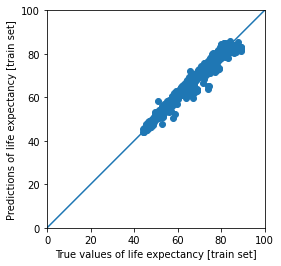

In [ ]:
yhat_train = model.predict(X_train).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_train, yhat_train)
plt.xlabel('True values of life expectancy [train set]')
plt.ylabel('Predictions of life expectancy [train set]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<h6 dir="rtl">
הצגת גרף ההתאמה בין ערכי החיזוי של המודל ובין הערכים האמיתיים עבור סט המבחן
</h6>

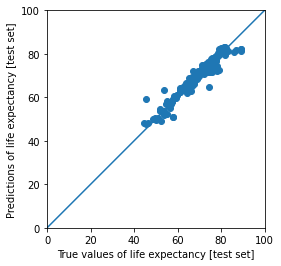

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, yhat_test)
plt.xlabel('True values of life expectancy [test set]')
plt.ylabel('Predictions of life expectancy [test set]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<h3 dir="rtl">
מסקנות: לאחר אימון המודל, המודל הגיע לשגיאה ממוצעת של כ-7, עבור כל הדוגמאות בtest
</h3>
<h3 dir="rtl">
בנוסף, הדיוק של המודל עבור חיזויים ששגיאתם קטנה מ-2.5 הוא כ-80%
</h3>